In [1]:
### in this task missing values *should be imputed* with the mean value of the column
### impute missing values only in columns required for solutions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (8, 4)})

#%matplotlib inline
#import matplotlib_inline
#matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("amazon_books_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        946 non-null    object 
 1   author       824 non-null    object 
 2   price        944 non-null    float64
 3   pages        934 non-null    float64
 4   avg_reviews  823 non-null    float64
 5   n_reviews    946 non-null    int64  
 6   dimensions   914 non-null    object 
 7   weight       943 non-null    object 
 8   language     943 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 66.6+ KB


In [4]:
### Data correction and imputation:

In [5]:
### Weight imputation:
df['weight'] = df['weight'].map(lambda x: float(str(x)[:-6]) * (1/16) if str(x).endswith('ounces') else float(str(x)[:-6]), na_action='ignore')
mean = df['weight'].mean()
df['weight'].fillna(mean, inplace=True)

In [6]:
### Pages imputation:
mean = round(df['pages'].mean())
df['pages'].fillna(mean, inplace=True)

In [7]:
### Volume imputation
def get_volume(dimensions):
    dimensions = str(dimensions)[:-6]
    dimensions = dimensions.split('x')
    volume = 1.0
    for length in dimensions:
        volume *= float(length)
    return float(volume)

df['volume'] = df['dimensions'].map(get_volume, na_action='ignore')
mean = df['volume'].mean()
df['volume'].fillna(mean, inplace=True)

In [8]:
### Price imputation:
mean = df['price'].mean()
df['price'].fillna(mean, inplace=True)

#### Question 1

In [9]:
### decide what data type each column is: numerical-discrete, numerical-continuous, categorical-nominal, categorical-ordinal
### consider only [price, pages, avg_reviews, n_reviews, language] for this analysis
### no need to add explanations, just the final answer

# Final answer:
# price - numerical-continuous
# pages - numerical-discrete
# avg_reviews - numerical-continuous
# n_reviews - numerical-discrete
# language - categorical-nominal

answer_list = [('price', 'numerical-continuous'), ('pages', 'numerical-discrete'), ('avg_reviews', 'numerical-continuous'), ('n_reviews', 'numerical-discrete'), ('language', 'categorical-nominal')]
answer_df = pd.DataFrame(answer_list, columns=['Column', 'Type'])
answer_df

,Column,Type
0,price,numerical-continuous
1,pages,numerical-discrete
2,avg_reviews,numerical-continuous
3,n_reviews,numerical-discrete
4,language,categorical-nominal


#### Question 2

In [10]:
### compute Pearson's correlation between pages and weight in the data
### (you can use the built-in Series.corr() function for that purpose)
answer_df = pd.DataFrame([('Correlation', df['pages'].corr(df['weight']))])
answer_df

,0,1
0,Correlation,0.569511


#### Question 3

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='pages', ylabel='weight'>

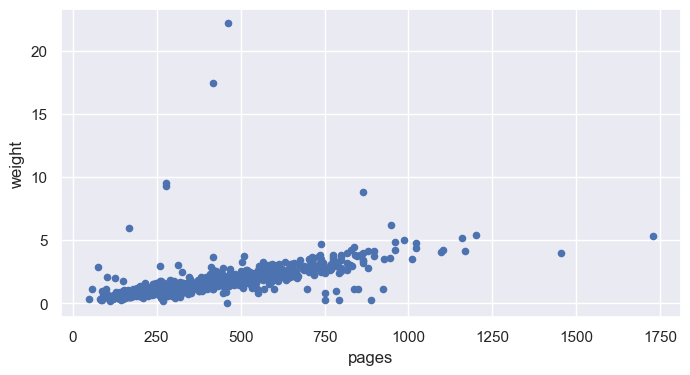

In [11]:
### show a scatter plot of pages (x) and weight (y)
### do the results fit the score you got in the previous cell? (no need to print answer to this question)
df[['pages', 'weight']].plot.scatter(x='pages', y='weight')

#### Question 4

In [12]:
### compute Pearson's correlation between a book's volume (inferred by its dimensions) and price in the data
### (you can use the built-in Series.corr() function for that purpose)
answer_df = pd.DataFrame([('Correlation', df['volume'].corr(df['price']))])
answer_df

,0,1
0,Correlation,0.41851


#### Question 5

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='volume', ylabel='price'>

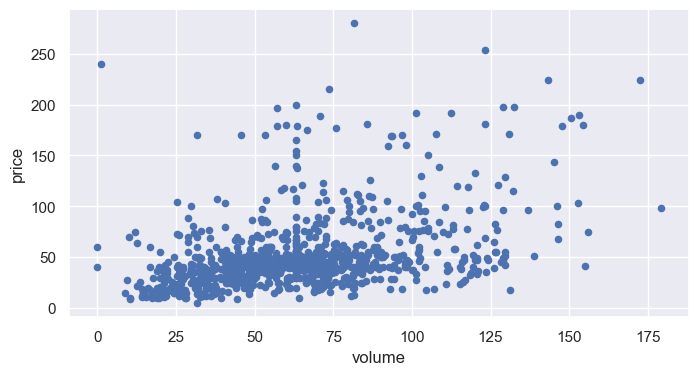

In [13]:
### show a scatter plot of a book's volume (inferred by its dimensions) and price
### do the results fit the score you got in the previous cell? (no need to print answer to this question)
df[['volume', 'price']].plot.scatter(x='volume', y='price')

#### Question 6

In [14]:
### inspect book titles carefully: they can be roughly split by keyphrases:
### ['data science', 'data analytics', 'data engineering', 'machine learning', 'statistics', 
### 'deep learning', 'natural language processing']

### a book belongs to one of the above categories if its name contains the corresponding keyphrase
### display the number of books that fall into each category and their total, in the same table
### some books may not belong to any of the listed above categories

key_phrases = ['data science', 'data analytics', 'data engineering', 'machine learning', 'statistics', 'deep learning', 'natural language processing']
df['title'] = df['title'].apply(lambda x: str(x).lower())
df['category'] = df['title'].apply(lambda x: [key_phrase for key_phrase in key_phrases if key_phrase in x])
key_counts = list()
for key_phrase in key_phrases:
    df[key_phrase] = df['category'].apply(lambda x: 1 if key_phrase in x else 0)
    key_counts.append((key_phrase, len(df[df[key_phrase] == 1])))

total = len(df[df['category'].apply(lambda x: len(x) > 0)])
key_counts.append(('Total', total))

answer_df = pd.DataFrame(key_counts, columns=['Key Phrase', 'Count'])
answer_df

,Key Phrase,Count
0,data science,111
1,data analytics,28
2,data engineering,7
3,machine learning,179
4,statistics,128
5,deep learning,138
6,natural language processing,13
7,Total,528


#### Question 7

In [15]:
### display the same result where the dataframe is sorted by the number of books, descending
### no need to display the total amount in this result - drop it
answer_df = answer_df.sort_values(by='Count', ascending=False)
answer_df = answer_df.drop(index=7)
answer_df.reset_index(drop=True, inplace=True)
answer_df

,Key Phrase,Count
0,machine learning,179
1,deep learning,138
2,statistics,128
3,data science,111
4,data analytics,28
5,natural language processing,13
6,data engineering,7


#### Question 8

In [26]:
### sample 10000 values from N~(10, 5)
### for this purpose use https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

### what portion of the distribution is found in the range (2.5, 17.5)? -- calculate using z table
### (recall the NormalDist().cdf() function we used at the lecture)

### what portion of the distribution is found in the range (2.5, 17.5)? -- compute empirically using the sampled values
### report both values (calculated and empirical)
import numpy as np
import statistics as st

# taking 10,000 samples of the above normal distribution
samples = np.random.normal(10, 5, 10000)
# calculating the portion of the distribution in the range (2.5, 17.5)
prob_portion = st.NormalDist(10, 5).cdf(17.5) - st.NormalDist(10, 5).cdf(2.5)
# calculating the portion of the distribution in the range (2.5, 17.5) empirically
empirical_portion = len([sample for sample in samples if 2.5 < sample < 17.5]) / len(samples)

answer_df = pd.DataFrame([('Z-table calculated', prob_portion), ('Empirical', empirical_portion)], columns=['Method', 'Portion'])
answer_df

,Method,Portion
0,Z-table calculated,0.866386
1,Empirical,0.871500


#### Question 9

In [34]:
### compute confidence interval of 95% for the true population mean of a book price on Amazon
### report left and right boundaries
mean, std, n = df['price'].mean(), df['price'].std(), len(df['price'])
alpha = 0.05
z = st.NormalDist().inv_cdf(1 - alpha / 2)
left, right = mean - z * std / np.sqrt(n), mean + z * std / np.sqrt(n)

answer_df = pd.DataFrame([('Left', left), ('Right', right)], columns=['Boundary', 'Value'])
answer_df

,Boundary,Value
0,Left,49.774292
1,Right,54.432763


#### Question 10

In [18]:
### can one say with (at least) 85% confidence that the true population mean of a book price resides within the [50.0, 53.0] interval?
### show your computations, and print your answer: yes or no

In [45]:
left_z = st.NormalDist().cdf((50 - mean) / (std / np.sqrt(n)))
right_z = st.NormalDist().cdf((53 - mean) / (std / np.sqrt(n)))
portion = right_z - left_z

answer_df = pd.DataFrame([('Answer', 'yes' if portion >= 0.85 else 'no')])
answer_df

,0,1
0,Answer,no
